In [1]:
# Classification Convolutional Neural Networks
# Introduction to Machine Learning and Artificial Intelligence (ET1550)
# Saleh Javadi
# BTH 2023

In [2]:
# Import the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [3]:
# Organizing the input data and their corresponding labels
imgs_path = "Traffic_dataset"
X = []
y = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        X.append(im)
        y.append(i)
X = np.array(X)
y = np.array(y)
print("success")

success


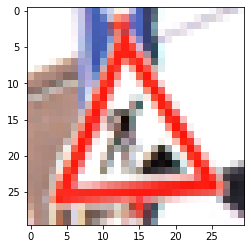

In [4]:
path = "Traffic_dataset/25/00025_00000_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
img = np.array(img) 
plt.imshow(img)
plt.show()

In [5]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


training shape:  (27446, 30, 30, 3) (27446,)
testing shape:  (11763, 30, 30, 3) (11763,)


In [6]:
# Build the model
model_CNN = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(rate=0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(43, activation='softmax')
])

In [7]:
# Compile the model
model_CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
# Fit the model
model_CNN.fit(x_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
429/429 [==============================] - 8s 6ms/step - loss: 2.3278 - accuracy: 0.4358
Epoch 2/20
429/429 [==============================] - 2s 6ms/step - loss: 0.7566 - accuracy: 0.7832
Epoch 3/20
429/429 [==============================] - 2s 5ms/step - loss: 0.4446 - accuracy: 0.8761
Epoch 4/20
429/429 [==============================] - 2s 5ms/step - loss: 0.3126 - accuracy: 0.9128
Epoch 5/20
429/429 [==============================] - 2s 5ms/step - loss: 0.2682 - accuracy: 0.9261
Epoch 6/20
429/429 [==============================] - 2s 5ms/step - loss: 0.2365 - accuracy: 0.9330
Epoch 7/20
429/429 [==============================] - 2s 5ms/step - loss: 0.2035 - accuracy: 0.9439
Epoch 8/20
429/429 [==============================] - 2s 5ms/step - loss: 0.1903 - accuracy: 0.9468
Epoch 9/20
429/429 [==============================] - 2s 5ms/step - loss: 0.1826 - accuracy: 0.9489
Epoch 10/20
429/429 [==============================] - 2s 5ms/step - loss: 0.1521 - accuracy: 0.9575

In [9]:
results = model_CNN.evaluate(x_test, y_test)
print("test loss, test acc:", results)

368/368 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9924
test loss, test acc: [0.028878360986709595, 0.9924339056015015]


In [10]:
predictions = model_CNN.predict(x_test[:10])
print(np.argmax(predictions, axis=1))

[26 15 13 10 15 12 25  2 11 35]


In [11]:
print(np.argmax(y_test[:10], axis=1))

[26 15 13 10 15 12 25  2 11 35]


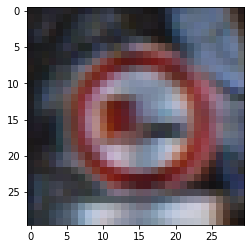

In [12]:
plt.imshow(x_test[3])
plt.show()

In [13]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }